In [1]:
import pandas as pd

# 假设 df1 和 df2 是您的两个 DataFrame
df1 = pd.read_csv('median_score_test.csv')  # 例如，这样读取第一个 CSV 文件
df1 = df1.rename(columns={'time':'date'})
df2 = pd.read_csv('2024-01-27 vcrix.csv')  # 读取第二个 CSV 文件

# 使用外连接合并 DataFrame
merged_df = pd.merge(df1, df2, on='date', how='outer')

# 输出结果
print(merged_df)


/Users/xrz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


      Unnamed: 0_x        date     score  Unnamed: 0_y     n       vcrix
0              0.0  2019-03-08  0.388390           429   429  452.088287
1              1.0  2019-03-12  0.381316           433   433  396.657829
2              2.0  2019-04-02  0.393216           454   454  227.890686
3              3.0  2019-04-03  0.385155           455   455  507.283847
4              4.0  2019-04-08  0.399100           460   460  441.012386
...            ...         ...       ...           ...   ...         ...
2209           NaN  2024-01-22       NaN          2210  2210  454.752391
2210           NaN  2024-01-23       NaN          2211  2211  484.224148
2211           NaN  2024-01-24       NaN          2212  2212  482.822613
2212           NaN  2024-01-25       NaN          2213  2213  480.765556
2213           NaN  2024-01-26       NaN          2214  2214  476.099382

[2214 rows x 6 columns]


In [2]:
merged_df = merged_df.dropna()

In [3]:
merged_df

,Unnamed: 0_x,date,score,Unnamed: 0_y,n,vcrix
0,0.0,2019-03-08,0.388390,429,429,452.088287
1,1.0,2019-03-12,0.381316,433,433,396.657829
2,2.0,2019-04-02,0.393216,454,454,227.890686
3,3.0,2019-04-03,0.385155,455,455,507.283847
4,4.0,2019-04-08,0.399100,460,460,441.012386
...,...,...,...,...,...,...
213,213.0,2019-11-19,0.390643,685,685,420.183044
214,214.0,2019-11-20,0.386242,686,686,419.428100
215,215.0,2019-11-21,0.384399,687,687,420.900033
216,216.0,2019-11-22,0.383016,688,688,435.873212


In [6]:
vc_dir = []
#5,7,8,9
time_pace = 7
for i in range(len(merged_df['vcrix'])-time_pace):
    vc_change = merged_df['vcrix'][i+time_pace] - merged_df['vcrix'][i]
    if vc_change > 0 :
        vc_dir.append(1)
    else:
        vc_dir.append(0)


In [8]:
setattr(pd, "Int64Index", pd.Index)
setattr(pd, "Float64Index", pd.Index)
import statsmodels.api as sm
import numpy as np

# 假设 x 和 y 是您的数据
x = np.array(list(merged_df['score'])[:len(merged_df['score'])-time_pace])
y = np.array(vc_dir)

# 为 x 添加截距项
X = sm.add_constant(x)

# 构建逻辑回归模型
model = sm.Logit(y, X)

# 拟合模型
result = model.fit()

# 打印回归结果
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.680511
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  211
Model:                          Logit   Df Residuals:                      209
Method:                           MLE   Df Model:                            1
Date:                Tue, 06 Feb 2024   Pseudo R-squ.:                 0.01745
Time:                        23:30:06   Log-Likelihood:                -143.59
converged:                       True   LL-Null:                       -146.14
Covariance Type:            nonrobust   LLR p-value:                   0.02392
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.2086      5.999     -2.202      0.028     -24.967      -1.451
x1            34.3830     15.

In [9]:
vc_chg = []
#5,7,8,9
for i in range(len(merged_df['vcrix'])-time_pace):
    vc_change = merged_df['vcrix'][i+time_pace] - merged_df['vcrix'][i]
    vc_chg.append(vc_change)

In [10]:
import statsmodels.api as sm
import numpy as np

# 假设 x 和 y 是您的数据
x_ = np.array(list(merged_df['score'])[:len(merged_df['score'])-time_pace])
y_ = np.array(vc_chg)

# 为 x 添加截距项
X = sm.add_constant(x_)

# 构建逻辑回归模型
model = sm.OLS(y_, X)

# 拟合模型
result = model.fit()

# 打印回归结果
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     4.468
Date:                Tue, 06 Feb 2024   Prob (F-statistic):             0.0357
Time:                        23:30:40   Log-Likelihood:                -1256.0
No. Observations:                 211   AIC:                             2516.
Df Residuals:                     209   BIC:                             2523.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -569.4564    269.549     -2.113      0.0

<ipython-input-12-d0627c31346c>:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_yticks([],[])
<ipython-input-12-d0627c31346c>:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax2.set_yticks([],[])


[]

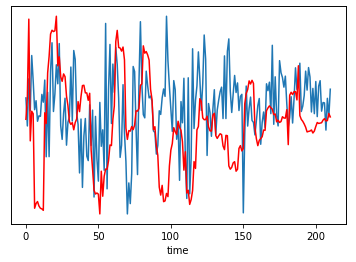

In [12]:
import matplotlib.pyplot as plt

# 创建图形和轴域
fig, ax1 = plt.subplots()


# 绘制第一组数据
ax1.plot(np.arange(len(x_)),x_)

ax1.set_xlabel('time')
#ax1.set_ylabel('Score', color='red')
ax1.set_yticks([],[])
# 创建第二个轴域
ax2 = ax1.twinx()

# 绘制第二组数据
ax2.plot(np.arange(len(y_)),y_,color = 'red') # 蓝色折线图
#ax2.set_ylabel('VCRIX_g', color='red')
ax2.set_yticks([],[])


#plt.tight_layout()

#plt.savefig("scorevsVCRIX2019-2.png")
# 显示图表
#plt.title("LSTM test")
#plt.suptitle(f"Gaussian kernel and bandwidth, h = {h}")
#plt.show()



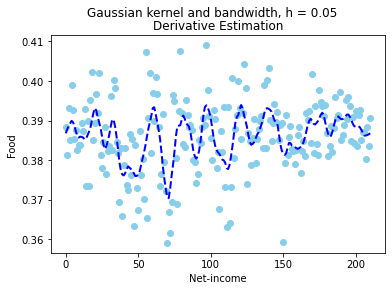

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load data
# 读取数据
x = np.arange(len(x_))
y = x_
indices = np.argsort(x)
x = x[indices]
y = y[indices]
#x_i = (i-0.5)/n
xs = np.array([(i-0.5)/len(x) for i in range(1,len(x)+1)])

# Bandwidth
h = 0.05

# Local polynomial regression
lowess = sm.nonparametric.lowess
mh = lowess(y, xs, frac=h, it=0)
md = lowess(y, xs, frac=h, it=1, delta=0.01)

# Plot
plt.plot(x, y, 'o', color='skyblue')
plt.plot(x, mh[:, 1], color='blue', linestyle='dashed', linewidth=2)
#plt.plot(x, md[:, 1], color='black', linewidth=2)
plt.xlabel("Net-income")
plt.ylabel("Food")
plt.title("Derivative Estimation")
plt.suptitle(f"Gaussian kernel and bandwidth, h = {h}")
plt.show()

<ipython-input-18-84fa16e2dc90>:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_yticks([],[])
<ipython-input-18-84fa16e2dc90>:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax2.set_yticks([],[])


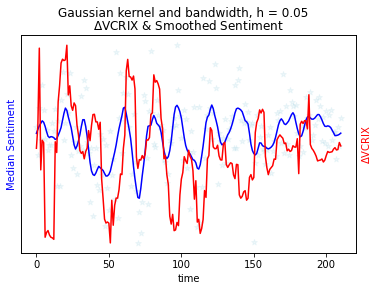

In [18]:
import matplotlib.pyplot as plt

# 创建图形和轴域
fig, ax1 = plt.subplots()


# 绘制第一组数据
ax1.plot(np.arange(len(x_)),mh[:, 1],color = 'blue')
ax1.scatter(np.arange(len(x_)),x_,color = 'lightblue',marker="*",alpha = 0.2)
ax1.set_xlabel('time')
ax1.set_ylabel('Median Sentiment', color='blue')
ax1.set_yticks([],[])
# 创建第二个轴域
ax2 = ax1.twinx()

# 绘制第二组数据
ax2.plot(np.arange(len(y_)),y_,color = 'red') # 蓝色折线图
ax2.set_ylabel('$\Delta$VCRIX', color='red')
ax2.set_yticks([],[])


#plt.tight_layout()

#plt.savefig("scorevsVCRIX2019-2.png")
# 显示图表

plt.title("$\Delta$VCRIX & Smoothed Sentiment")
plt.suptitle(f"Gaussian kernel and bandwidth, h = {h}")
#plt.show()
plt.savefig('vcrix_plot.png',transparent =  True)



In [17]:
import numpy as np

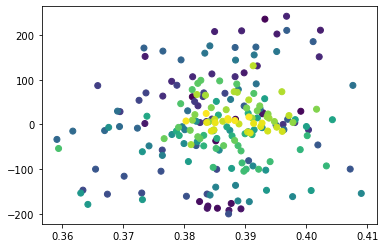

In [21]:
time = np.arange(len(x_))
plt.scatter(x_,y_,c = time, cmap = 'viridis')
plt.savefig('vcrix_scatter.png')